In [5]:
import psutil
import os
process = psutil.Process(os.getpid())
print(f'{process.memory_info().rss} bytes')
print(f'{process.memory_info().rss/(1024*1024)} Mbytes')

485949440 bytes
463.4375 Mbytes


In [1]:
import torch
from dataset.utils import *
from losses import *
from utils import *
from net.resnet import *
from net.googlenet import *
from net.bn_inception import *
from net.pfe import *
from train import train_model
import pytorch_metric_learning as pml

In [2]:
batch_size = 32
def redefine_train_parameters():
    global device, epochs, learning_rate, loss_lr, num_classes, embedding_size
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    epochs = 20
    learning_rate = 0.001
    loss_lr = 0.01
    num_classes = get_num_classes(train_dataset)
    embedding_size = 512

In [3]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=10, min_samples=50, image_size=100)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=10, min_samples=50, image_size=100)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

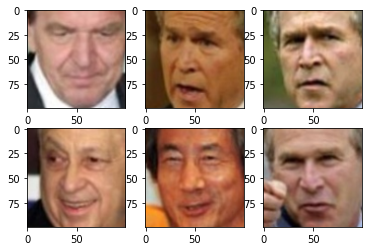

In [11]:
display_images(train_loader, h=2,w=3)

In [18]:
model = Resnet50(embedding_size=embedding_size, pretrained=True)
model.to(device)
# evaluate_accuracy(model, test_loader)

Resnet50(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

In [13]:
evaluate_cos(model, test_loader)

100%|██████████| 14/14 [00:13<00:00,  1.04it/s]


R@1 : 48.649
R@2 : 62.613
R@4 : 77.027
R@8 : 87.838
R@16 : 93.694
R@32 : 98.198


[0.4864864864864865,
 0.6261261261261262,
 0.7702702702702703,
 0.8783783783783784,
 0.9369369369369369,
 0.9819819819819819]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


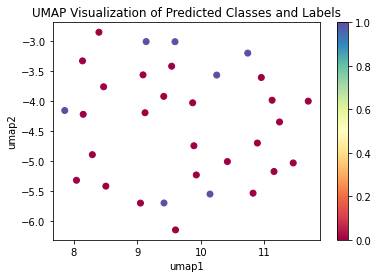

In [14]:
visualize_umap(model, test_loader)

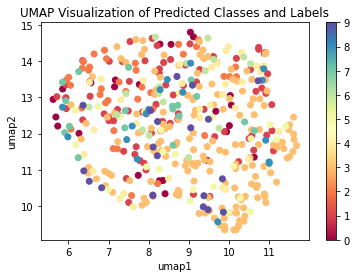

In [15]:
visualize_umap(model, test_loader, mode=2)

In [4]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_proxy.ptm',
                    verbose=2)

Step: [10/29] Epoch [1/20] Loss: 3.5876 Time: 11.8177
Step: [20/29] Epoch [1/20] Loss: 6.6714 Time: 21.2044
Step: [29/29] Epoch [1/20] Loss: 9.0719 Time: 29.1988
Epoch [1/20] Loss: 9.0719 Time: 29.1995 Learning rate: 0.001
Step: [10/29] Epoch [2/20] Loss: 2.4856 Time: 38.6619
Step: [20/29] Epoch [2/20] Loss: 4.8372 Time: 48.2836
Step: [29/29] Epoch [2/20] Loss: 6.9665 Time: 56.2381
Epoch [2/20] Loss: 6.9665 Time: 56.2384 Learning rate: 0.001
Step: [10/29] Epoch [3/20] Loss: 1.9887 Time: 65.6356
Step: [20/29] Epoch [3/20] Loss: 4.4037 Time: 75.0573
Step: [29/29] Epoch [3/20] Loss: 6.3545 Time: 83.2544
Epoch [3/20] Loss: 6.3545 Time: 83.2548 Learning rate: 0.001
Step: [10/29] Epoch [4/20] Loss: 1.9327 Time: 92.6312
Step: [20/29] Epoch [4/20] Loss: 3.6043 Time: 102.0397
Step: [29/29] Epoch [4/20] Loss: 4.6600 Time: 109.9803
Epoch [4/20] Loss: 4.6600 Time: 109.9819 Learning rate: 0.001
Step: [10/29] Epoch [5/20] Loss: 1.0847 Time: 119.6028
Step: [20/29] Epoch [5/20] Loss: 2.7950 Time: 128.

In [5]:
model = torch.load('./saved_models/resnet50_lfw10_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [6]:
evaluate_cos(model, test_loader)

100%|██████████| 14/14 [00:12<00:00,  1.08it/s]


R@1 : 95.495
R@2 : 97.072
R@4 : 97.523
R@8 : 97.973
R@16 : 97.973
R@32 : 99.099


[0.954954954954955,
 0.9707207207207207,
 0.9752252252252253,
 0.9797297297297297,
 0.9797297297297297,
 0.990990990990991]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


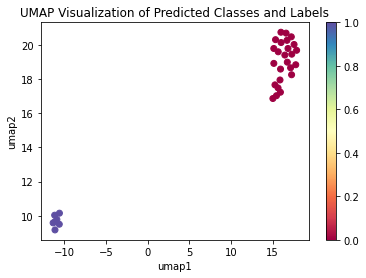

In [7]:
visualize_umap(model, test_loader)

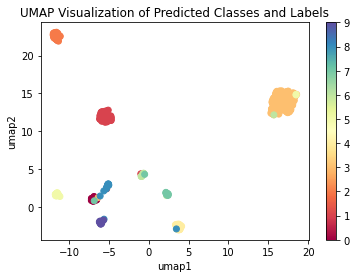

In [8]:
visualize_umap(model, test_loader, mode=2)

In [4]:
model = train_model(model_name='pfe',
                    loss_func_name='mutual_likelihood_score',
                    optimizer='sgd',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_pfe.ptm',
                    verbose=2)

Step: [10/29] Epoch [1/20] Loss: -997.6389 Time: 11.3369
Step: [20/29] Epoch [1/20] Loss: -1993.3400 Time: 20.7559
Step: [29/29] Epoch [1/20] Loss: -2890.1689 Time: 28.5515
Epoch [1/20] Loss: -2890.1689 Time: 28.5516 Learning rate: 0.001
Step: [10/29] Epoch [2/20] Loss: -997.0134 Time: 37.7087
Step: [20/29] Epoch [2/20] Loss: -1992.9785 Time: 46.8647
Step: [29/29] Epoch [2/20] Loss: -2890.0208 Time: 54.5936
Epoch [2/20] Loss: -2890.0208 Time: 54.5937 Learning rate: 0.001
Step: [10/29] Epoch [3/20] Loss: -996.5049 Time: 64.0051
Step: [20/29] Epoch [3/20] Loss: -1992.7219 Time: 73.2086
Step: [29/29] Epoch [3/20] Loss: -2889.9553 Time: 81.0110
Epoch [3/20] Loss: -2889.9553 Time: 81.0114 Learning rate: 0.001
Step: [10/29] Epoch [4/20] Loss: -995.8602 Time: 90.1721
Step: [20/29] Epoch [4/20] Loss: -1991.9795 Time: 99.5694
Step: [29/29] Epoch [4/20] Loss: -2889.6787 Time: 107.3588
Epoch [4/20] Loss: -2889.6787 Time: 107.3591 Learning rate: 0.001
Step: [10/29] Epoch [5/20] Loss: -996.4183 Tim

In [5]:
model = torch.load('./saved_models/resnet50_lfw10_pfe.ptm')
# evaluate_accuracy(model, test_loader)

In [6]:
evaluate_cos(model, test_loader)

100%|██████████| 14/14 [00:12<00:00,  1.10it/s]


R@1 : 50.225
R@2 : 65.541
R@4 : 77.703
R@8 : 87.387
R@16 : 92.117
R@32 : 96.847


[0.5022522522522522,
 0.6554054054054054,
 0.777027027027027,
 0.8738738738738738,
 0.9211711711711712,
 0.9684684684684685]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


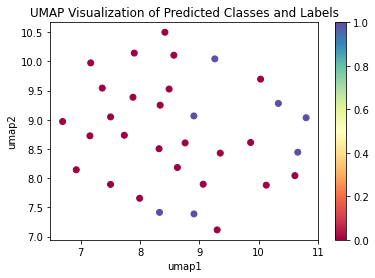

In [7]:
visualize_umap(model, test_loader)

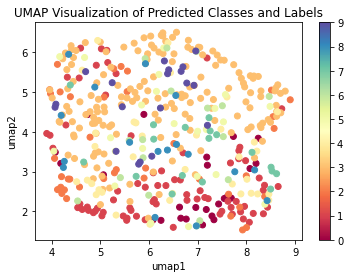

In [8]:
visualize_umap(model, test_loader, mode=2)

In [3]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=10, min_samples=50, image_size=100, hist='v')
test_dataset = make_dataset('LFWCustom', split='test', max_classes=10, min_samples=50, image_size=100, hist='v')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

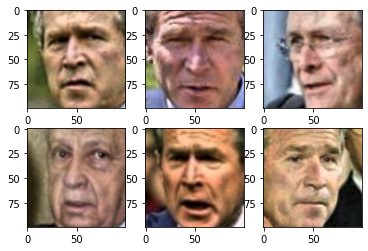

In [4]:
display_images(train_loader, h=2,w=3)

In [12]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_adapthist_proxy.ptm',
                    verbose=2)

Step: [10/29] Epoch [1/20] Loss: 3.6320 Time: 12.1152
Step: [20/29] Epoch [1/20] Loss: 6.6748 Time: 23.9714
Step: [29/29] Epoch [1/20] Loss: 9.0183 Time: 34.1496
Epoch [1/20] Loss: 9.0183 Time: 34.1499 Learning rate: 0.001
Step: [10/29] Epoch [2/20] Loss: 2.5253 Time: 45.9441
Step: [20/29] Epoch [2/20] Loss: 4.9492 Time: 57.7323
Step: [29/29] Epoch [2/20] Loss: 7.1806 Time: 67.6753
Epoch [2/20] Loss: 7.1806 Time: 67.6761 Learning rate: 0.001
Step: [10/29] Epoch [3/20] Loss: 2.2963 Time: 79.6692
Step: [20/29] Epoch [3/20] Loss: 4.2934 Time: 91.4139
Step: [29/29] Epoch [3/20] Loss: 6.0105 Time: 101.3520
Epoch [3/20] Loss: 6.0105 Time: 101.3524 Learning rate: 0.001
Step: [10/29] Epoch [4/20] Loss: 1.7466 Time: 113.3451
Step: [20/29] Epoch [4/20] Loss: 3.4357 Time: 125.1193
Step: [29/29] Epoch [4/20] Loss: 5.0002 Time: 135.0785
Epoch [4/20] Loss: 5.0002 Time: 135.0787 Learning rate: 0.001
Step: [10/29] Epoch [5/20] Loss: 1.3545 Time: 147.0810
Step: [20/29] Epoch [5/20] Loss: 2.4631 Time: 1

In [13]:
model = torch.load('./saved_models/resnet50_lfw10_adapthist_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [14]:
evaluate_cos(model, test_loader)

100%|██████████| 14/14 [00:16<00:00,  1.16s/it]


R@1 : 95.946
R@2 : 96.847
R@4 : 97.523
R@8 : 98.423
R@16 : 98.874
R@32 : 99.550


[0.9594594594594594,
 0.9684684684684685,
 0.9752252252252253,
 0.9842342342342343,
 0.9887387387387387,
 0.9954954954954955]

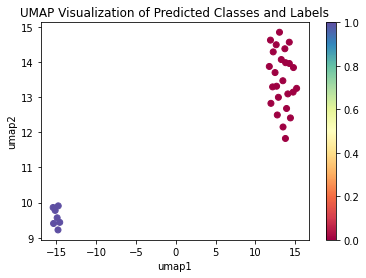

In [15]:
visualize_umap(model, test_loader)

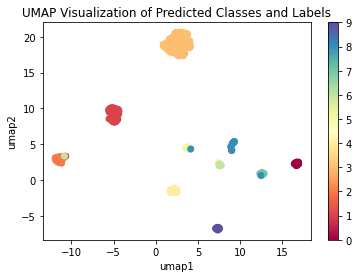

In [16]:
visualize_umap(model, test_loader, mode=2)

In [10]:
model = train_model(model_name='pfe',
                    loss_func_name='mutual_likelihood_score',
                    optimizer='sgd',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_adapthist_pfe.ptm',
                    verbose=2)

Step: [10/29] Epoch [1/20] Loss: -991.6666 Time: 11.7986
Step: [20/29] Epoch [1/20] Loss: -1983.9370 Time: 23.4794
Step: [29/29] Epoch [1/20] Loss: -2877.8253 Time: 33.2831
Epoch [1/20] Loss: -2877.8253 Time: 33.2833 Learning rate: 0.001
Step: [10/29] Epoch [2/20] Loss: -993.7279 Time: 45.0826
Step: [20/29] Epoch [2/20] Loss: -1986.7509 Time: 56.6969
Step: [29/29] Epoch [2/20] Loss: -2877.7020 Time: 66.5264
Epoch [2/20] Loss: -2877.7020 Time: 66.5266 Learning rate: 0.001
Step: [10/29] Epoch [3/20] Loss: -993.0981 Time: 78.3430
Step: [20/29] Epoch [3/20] Loss: -1984.3464 Time: 89.9435
Step: [29/29] Epoch [3/20] Loss: -2876.7155 Time: 99.7405
Epoch [3/20] Loss: -2876.7155 Time: 99.7406 Learning rate: 0.001
Step: [10/29] Epoch [4/20] Loss: -990.3492 Time: 111.3666
Step: [20/29] Epoch [4/20] Loss: -1982.3852 Time: 123.1478
Step: [29/29] Epoch [4/20] Loss: -2875.5779 Time: 132.9621
Epoch [4/20] Loss: -2875.5779 Time: 132.9625 Learning rate: 0.0001
Step: [10/29] Epoch [5/20] Loss: -991.1482 

In [11]:
model = torch.load('./saved_models/resnet50_lfw10_adapthist_pfe.ptm')
# evaluate_accuracy(model, test_loader)

In [12]:
evaluate_cos(model, test_loader)

100%|██████████| 14/14 [00:16<00:00,  1.15s/it]


R@1 : 47.748
R@2 : 63.288
R@4 : 76.351
R@8 : 85.360
R@16 : 92.568
R@32 : 97.072


[0.4774774774774775,
 0.6328828828828829,
 0.7635135135135135,
 0.8536036036036037,
 0.9256756756756757,
 0.9707207207207207]

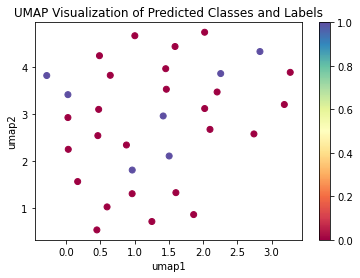

In [13]:
visualize_umap(model, test_loader)

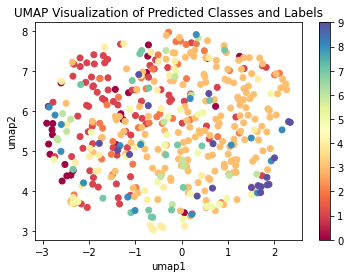

In [14]:
visualize_umap(model, test_loader, mode=2)

In [8]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=10, min_samples=50, image_size=100, hist='s')
test_dataset = make_dataset('LFWCustom', split='test', max_classes=10, min_samples=50, image_size=100, hist='s')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

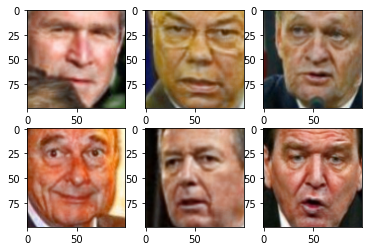

In [9]:
display_images(train_loader, h=2,w=3)

In [10]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_adapthist-s_proxy.ptm',
                    verbose=2)

Step: [10/29] Epoch [1/20] Loss: 3.5893 Time: 11.9425
Step: [20/29] Epoch [1/20] Loss: 6.7416 Time: 23.9303
Step: [29/29] Epoch [1/20] Loss: 9.2516 Time: 33.8680
Epoch [1/20] Loss: 9.2516 Time: 33.8683 Learning rate: 0.001
Step: [10/29] Epoch [2/20] Loss: 2.5736 Time: 45.6222
Step: [20/29] Epoch [2/20] Loss: 5.1191 Time: 57.5652
Step: [29/29] Epoch [2/20] Loss: 7.4173 Time: 67.4720
Epoch [2/20] Loss: 7.4173 Time: 67.4724 Learning rate: 0.001
Step: [10/29] Epoch [3/20] Loss: 2.2821 Time: 79.2253
Step: [20/29] Epoch [3/20] Loss: 4.3733 Time: 91.1643
Step: [29/29] Epoch [3/20] Loss: 5.8954 Time: 101.0595
Epoch [3/20] Loss: 5.8954 Time: 101.0601 Learning rate: 0.001
Step: [10/29] Epoch [4/20] Loss: 1.5648 Time: 112.7808
Step: [20/29] Epoch [4/20] Loss: 3.2587 Time: 124.7006
Step: [29/29] Epoch [4/20] Loss: 5.2170 Time: 134.6294
Epoch [4/20] Loss: 5.2170 Time: 134.6299 Learning rate: 0.001
Step: [10/29] Epoch [5/20] Loss: 1.6266 Time: 146.3828
Step: [20/29] Epoch [5/20] Loss: 3.2614 Time: 1

In [11]:
model = torch.load('./saved_models/resnet50_lfw10_adapthist-s_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [12]:
evaluate_cos(model, test_loader)

100%|██████████| 14/14 [00:15<00:00,  1.14s/it]

R@1 : 95.946
R@2 : 97.072
R@4 : 97.523
R@8 : 97.973
R@16 : 97.973
R@32 : 98.423


[0.9594594594594594,
 0.9707207207207207,
 0.9752252252252253,
 0.9797297297297297,
 0.9797297297297297,
 0.9842342342342343]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


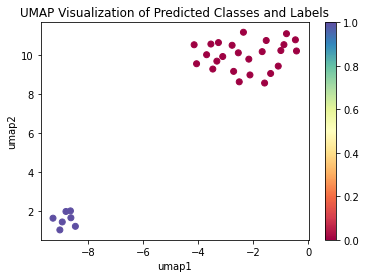

In [13]:
visualize_umap(model, test_loader)

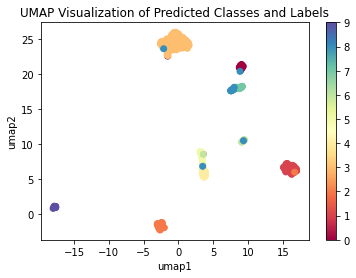

In [14]:
visualize_umap(model, test_loader, mode=2)

In [15]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=10, min_samples=50, image_size=100, hist='sv')
test_dataset = make_dataset('LFWCustom', split='test', max_classes=10, min_samples=50, image_size=100, hist='sv')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

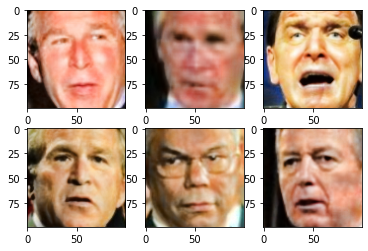

In [16]:
display_images(train_loader, h=2,w=3)

In [17]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_adapthist-sv_proxy.ptm',
                    verbose=2)

Step: [10/29] Epoch [1/20] Loss: 3.6359 Time: 13.7875
Step: [20/29] Epoch [1/20] Loss: 6.8135 Time: 27.7669
Step: [29/29] Epoch [1/20] Loss: 9.3791 Time: 39.4578
Epoch [1/20] Loss: 9.3791 Time: 39.4580 Learning rate: 0.001
Step: [10/29] Epoch [2/20] Loss: 2.4555 Time: 53.2957
Step: [20/29] Epoch [2/20] Loss: 4.9810 Time: 67.3221
Step: [29/29] Epoch [2/20] Loss: 7.2898 Time: 78.9404
Epoch [2/20] Loss: 7.2898 Time: 78.9408 Learning rate: 0.001
Step: [10/29] Epoch [3/20] Loss: 2.4199 Time: 92.7332
Step: [20/29] Epoch [3/20] Loss: 4.4197 Time: 106.7129
Step: [29/29] Epoch [3/20] Loss: 5.9541 Time: 118.3579
Epoch [3/20] Loss: 5.9541 Time: 118.3587 Learning rate: 0.001
Step: [10/29] Epoch [4/20] Loss: 1.9827 Time: 132.1411
Step: [20/29] Epoch [4/20] Loss: 4.0305 Time: 146.0783
Step: [29/29] Epoch [4/20] Loss: 5.4770 Time: 157.6891
Epoch [4/20] Loss: 5.4770 Time: 157.6896 Learning rate: 0.001
Step: [10/29] Epoch [5/20] Loss: 1.7671 Time: 171.4753
Step: [20/29] Epoch [5/20] Loss: 3.3189 Time: 

In [18]:
model = torch.load('./saved_models/resnet50_lfw10_adapthist-sv_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [19]:
evaluate_cos(model, test_loader)

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]


R@1 : 94.144
R@2 : 95.045
R@4 : 95.946
R@8 : 96.396
R@16 : 97.523
R@32 : 98.649


[0.9414414414414415,
 0.9504504504504504,
 0.9594594594594594,
 0.963963963963964,
 0.9752252252252253,
 0.9864864864864865]

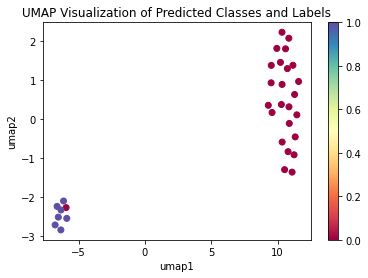

In [20]:
visualize_umap(model, test_loader)

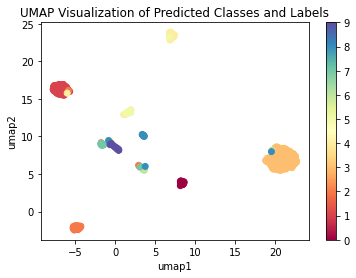

In [21]:
visualize_umap(model, test_loader, mode=2)

In [3]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=10, min_samples=50, image_size=100, median=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=10, min_samples=50, image_size=100, median=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

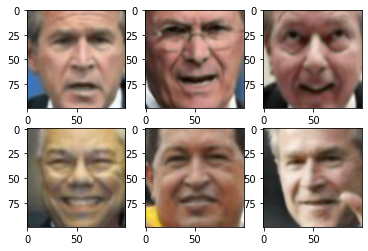

In [4]:
display_images(train_loader, h=2,w=3)

In [5]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_median_proxy.ptm',
                    verbose=2)

Step: [10/29] Epoch [1/20] Loss: 3.4258 Time: 15.0290
Step: [20/29] Epoch [1/20] Loss: 6.4351 Time: 27.4255
Step: [29/29] Epoch [1/20] Loss: 9.0312 Time: 38.0217
Epoch [1/20] Loss: 9.0312 Time: 38.0219 Learning rate: 0.001
Step: [10/29] Epoch [2/20] Loss: 2.5446 Time: 50.4916
Step: [20/29] Epoch [2/20] Loss: 4.8455 Time: 62.8454
Step: [29/29] Epoch [2/20] Loss: 6.8598 Time: 73.4974
Epoch [2/20] Loss: 6.8598 Time: 73.4982 Learning rate: 0.001
Step: [10/29] Epoch [3/20] Loss: 2.3491 Time: 85.8543
Step: [20/29] Epoch [3/20] Loss: 4.4417 Time: 98.2069
Step: [29/29] Epoch [3/20] Loss: 6.3170 Time: 108.7980
Epoch [3/20] Loss: 6.3170 Time: 108.7984 Learning rate: 0.001
Step: [10/29] Epoch [4/20] Loss: 1.6334 Time: 121.0907
Step: [20/29] Epoch [4/20] Loss: 3.5594 Time: 133.4071
Step: [29/29] Epoch [4/20] Loss: 5.1543 Time: 144.0117
Epoch [4/20] Loss: 5.1543 Time: 144.0122 Learning rate: 0.001
Step: [10/29] Epoch [5/20] Loss: 1.2004 Time: 156.3518
Step: [20/29] Epoch [5/20] Loss: 2.4834 Time: 1

In [6]:
model = torch.load('./saved_models/resnet50_lfw10_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [7]:
evaluate_cos(model, test_loader)

100%|██████████| 14/14 [00:16<00:00,  1.21s/it]


R@1 : 96.171
R@2 : 97.297
R@4 : 97.748
R@8 : 98.198
R@16 : 98.198
R@32 : 99.550


[0.9617117117117117,
 0.972972972972973,
 0.9774774774774775,
 0.9819819819819819,
 0.9819819819819819,
 0.9954954954954955]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


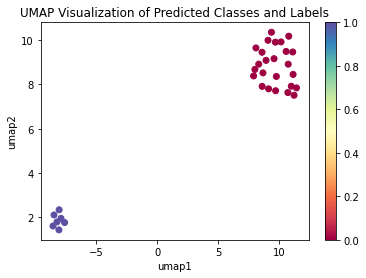

In [8]:
visualize_umap(model, test_loader)

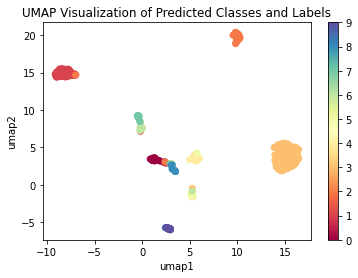

In [9]:
visualize_umap(model, test_loader, mode=2)

In [3]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=10, min_samples=50, image_size=100, hist='v', median=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=10, min_samples=50, image_size=100, hist='v', median=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

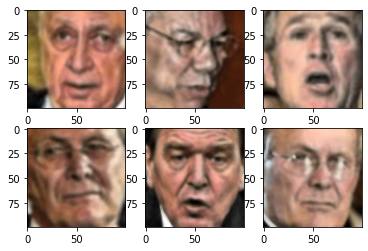

In [4]:
display_images(train_loader, h=2,w=3)

In [5]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_adapthist_median_proxy.ptm',
                    verbose=2)

Step: [10/29] Epoch [1/20] Loss: 3.7277 Time: 17.5258
Step: [20/29] Epoch [1/20] Loss: 6.6777 Time: 32.5669
Step: [29/29] Epoch [1/20] Loss: 9.0204 Time: 45.1150
Epoch [1/20] Loss: 9.0204 Time: 45.1153 Learning rate: 0.001
Step: [10/29] Epoch [2/20] Loss: 2.3157 Time: 60.1092
Step: [20/29] Epoch [2/20] Loss: 4.5033 Time: 74.9342
Step: [29/29] Epoch [2/20] Loss: 6.5208 Time: 87.4418
Epoch [2/20] Loss: 6.5208 Time: 87.4419 Learning rate: 0.001
Step: [10/29] Epoch [3/20] Loss: 2.4756 Time: 102.2270
Step: [20/29] Epoch [3/20] Loss: 4.4707 Time: 117.2283
Step: [29/29] Epoch [3/20] Loss: 6.2647 Time: 129.7576
Epoch [3/20] Loss: 6.2647 Time: 129.7582 Learning rate: 0.001
Step: [10/29] Epoch [4/20] Loss: 2.3249 Time: 144.8122
Step: [20/29] Epoch [4/20] Loss: 3.6309 Time: 159.6908
Step: [29/29] Epoch [4/20] Loss: 5.0692 Time: 172.2796
Epoch [4/20] Loss: 5.0692 Time: 172.2799 Learning rate: 0.001
Step: [10/29] Epoch [5/20] Loss: 1.4503 Time: 187.2795
Step: [20/29] Epoch [5/20] Loss: 2.7077 Time:

In [6]:
model = torch.load('./saved_models/resnet50_lfw10_adapthist_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [7]:
evaluate_cos(model, test_loader)

100%|██████████| 14/14 [00:20<00:00,  1.45s/it]


R@1 : 94.369
R@2 : 95.946
R@4 : 97.297
R@8 : 97.973
R@16 : 97.973
R@32 : 99.099


[0.9436936936936937,
 0.9594594594594594,
 0.972972972972973,
 0.9797297297297297,
 0.9797297297297297,
 0.990990990990991]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


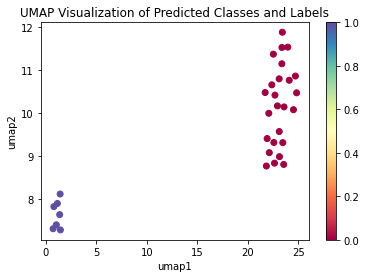

In [8]:
visualize_umap(model, test_loader)

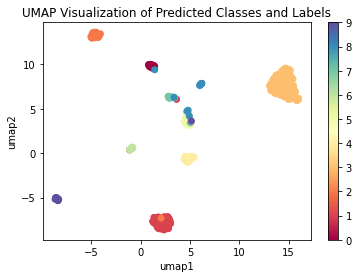

In [9]:
visualize_umap(model, test_loader, mode=2)